In [1]:
%%html
<style>
.container { width:80% !important; }
</style>

In [16]:
from __future__ import division
import numpy as np
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [212]:
import utils
import scale_utils as sc
import numpy as np
import matplotlib.pyplot as plt
import pywt

# data load : Y is an array  n*m, where n is the ecg's number and m the number of points per ecg
Y = np.load( "/home/cardiologs/Workspace/denoising/code/data/[DE-IDENTIFIED]_#DICOM#_0000A0A5_0926_000E_0926_286321_635440525514417877.dcm.npz" )
Y = Y["data"]

#ESTIMATION DU BRUIT DES DONNÉES
#v = utils.noise_estimation(Y)
#print v

#bruitage des données
sigma = 0.04
Yb = Y + sigma * np.random.standard_normal(Y.shape)
ind = 9

In [125]:
N = len(Yb[0])
v = sc.noise_estimation(Yb[ind])
print v
print N


0.115289081035
5000


Tau hard optimal : 3.70300500835
Tau semisoft optimal : 3.70300500835
Tau soft optimal : 1.38914858097
Tau stein optimal : 2.38080133556


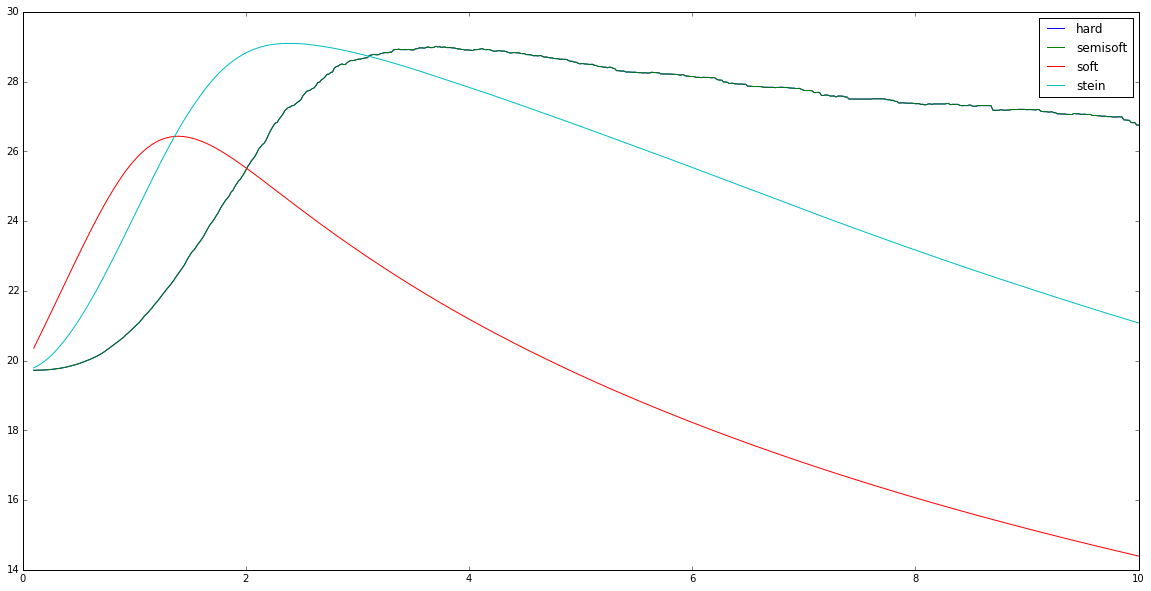

In [127]:
plt.figure(figsize=(20, 10))
def filt (y, tau):
    return sc.invariant_wave_filter(y, sigma, tau, w, m=200)

parameters = np.linspace(0.1,10, 600)
tauopt = utils.opt(parameters, filt, Yb[ind], Y[ind])
print( "Tau hard optimal : " + str(tauopt))

def filtsm (y, tau):
    return sc.invariant_wave_filter(y, sigma, tau, w, m=200, mode='semisoft')

tausm = utils.opt(parameters, filt, Yb[ind], Y[ind])
print( "Tau semisoft optimal : " + str(tausm))

def filt_soft (y, tau):
    return sc.invariant_wave_filter(y, sigma, tau, w, m=200, mode='soft')

tausoft = utils.opt(parameters, filt_soft, Yb[ind], Y[ind])
print( "Tau soft optimal : " + str(tausoft))

def filt (y, tau):
    return sc.invariant_wave_filter(y, sigma, tau, w, m=200, mode='stein')

taustein = utils.opt(parameters, filt, Yb[ind], Y[ind])
print( "Tau stein optimal : " + str(taustein))


plt.legend( ['hard', 'semisoft', 'soft', 'stein'])

513


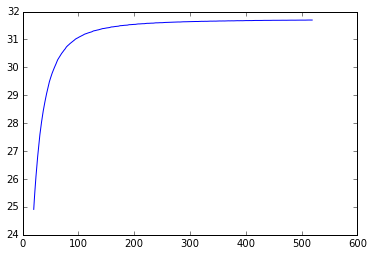

In [70]:
p = range(20, 520)
def filtm ( y, m):
    return sc.invariant_wave_filter(y, sigma, tauopt, w, m)
mOpt = utils.opt(p, filtm, Yb[ind], Y[ind])
print mOpt

In [201]:
from scipy.io import loadmat
Xs = loadmat("data/output/bm_out_%s.mat" % sigma)
Xb = Xs["Xb"]
Xd = Xs["Xd"]
Xb.shape

(12, 5000)

In [202]:
invariant sure : 25.33

SyntaxError: invalid syntax (<ipython-input-202-6ebae1f2fbf7>, line 1)

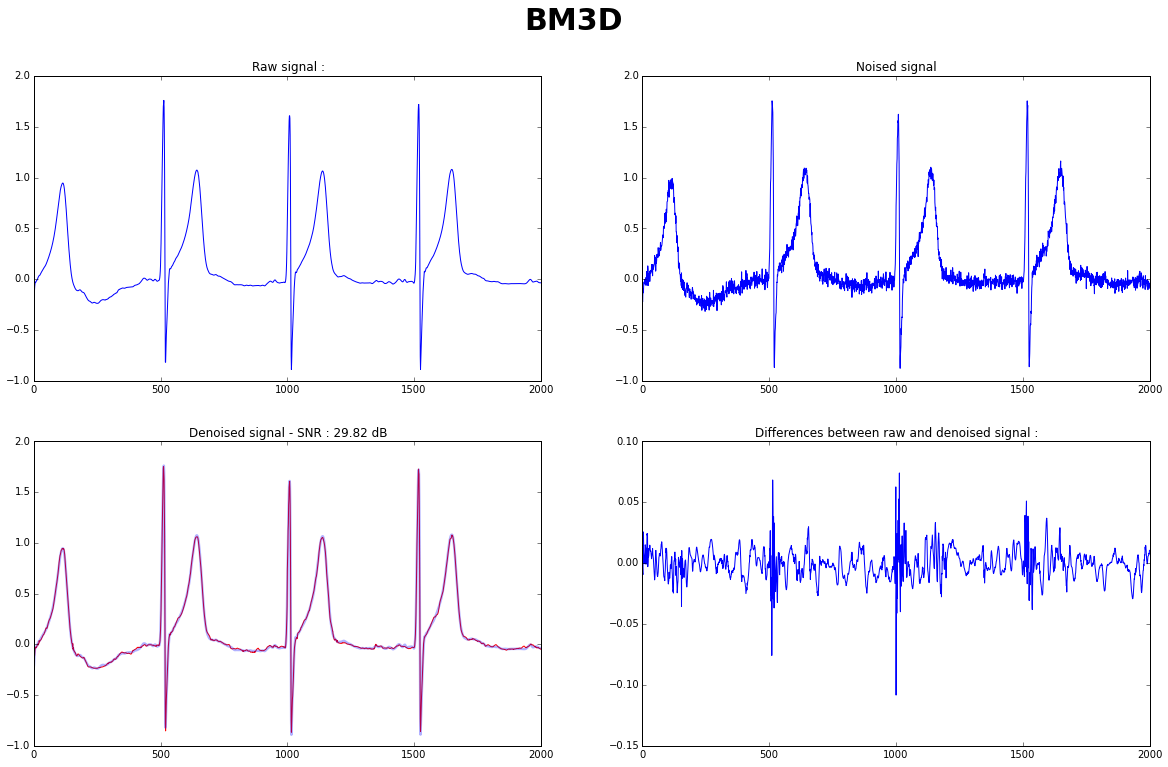

In [203]:
sc.splot(Xb[ind], Y[ind], Xd[ind], title="BM3D")

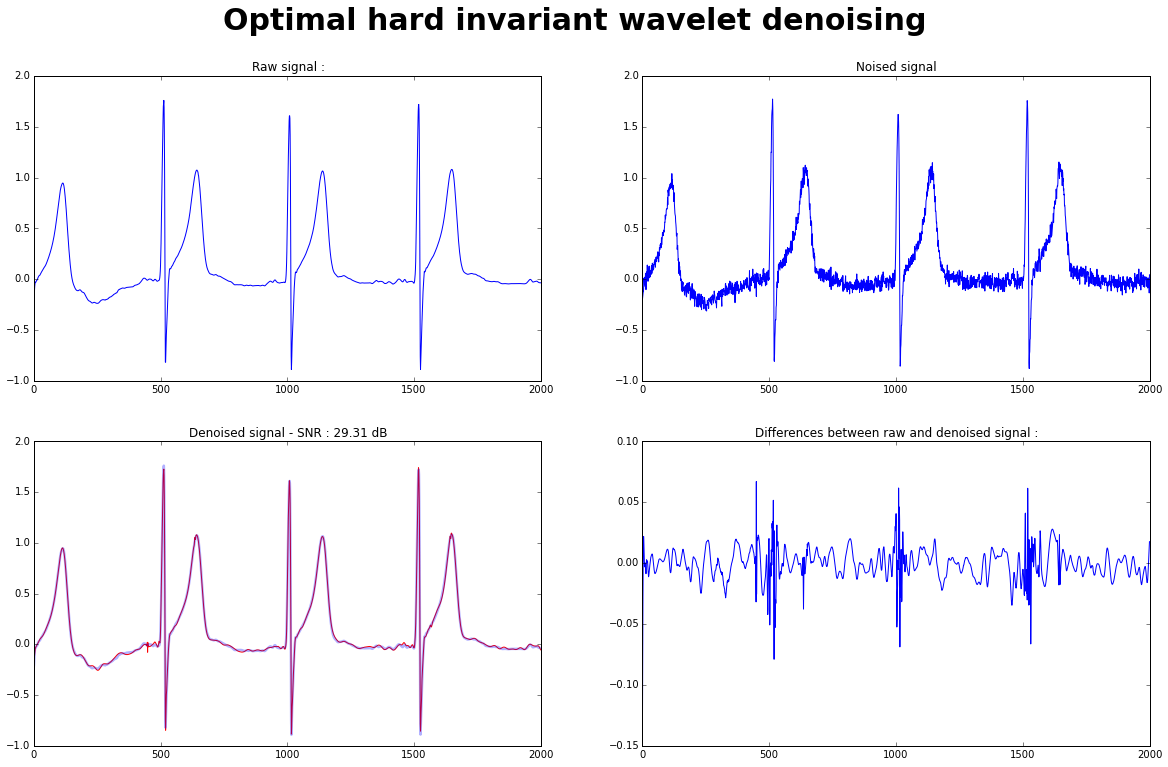

In [204]:
sc.filt_plot(Yb[ind], Y[ind], sc.invariant_wave_filter, params={"sigma": sigma, "tau": tauopt, "w": w, "m": 200}, title='Optimal hard invariant wavelet denoising')

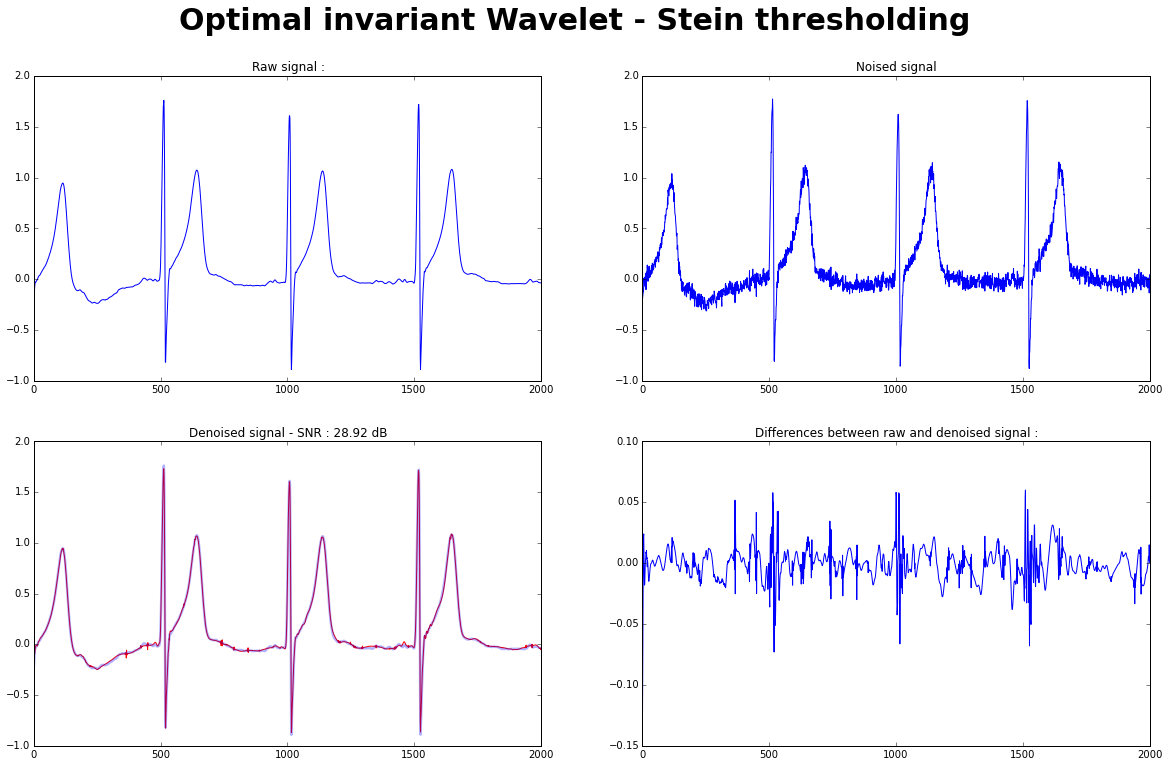

In [205]:
sc.filt_plot(Yb[ind], Y[ind], sc.invariant_wave_filter, params={"sigma": sigma, "tau": taustein, "w" : 'db6', "mode" : 'stein', "m": 200}, title="Optimal invariant Wavelet - Stein thresholding")

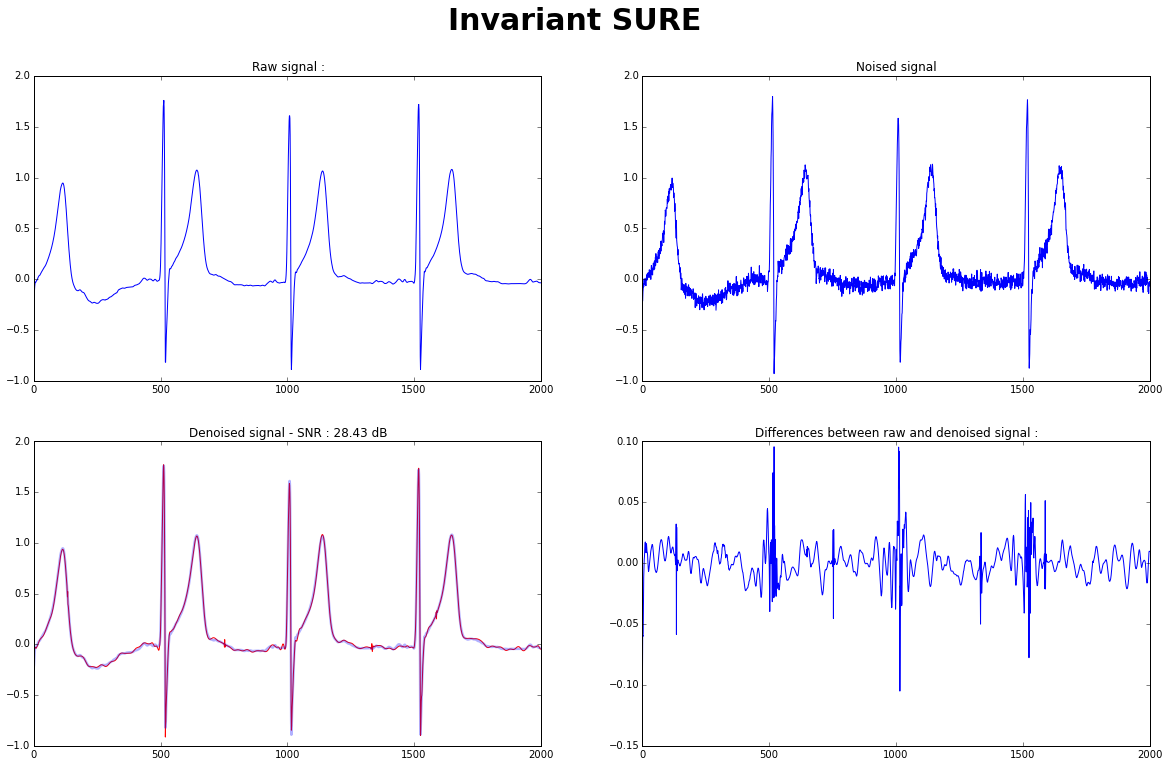

In [213]:
sc.filt_plot(Yb[ind], Y[ind], sc.invariant_multi_wave_filter, params={"w":w, "m": 200 }, title="Invariant SURE")

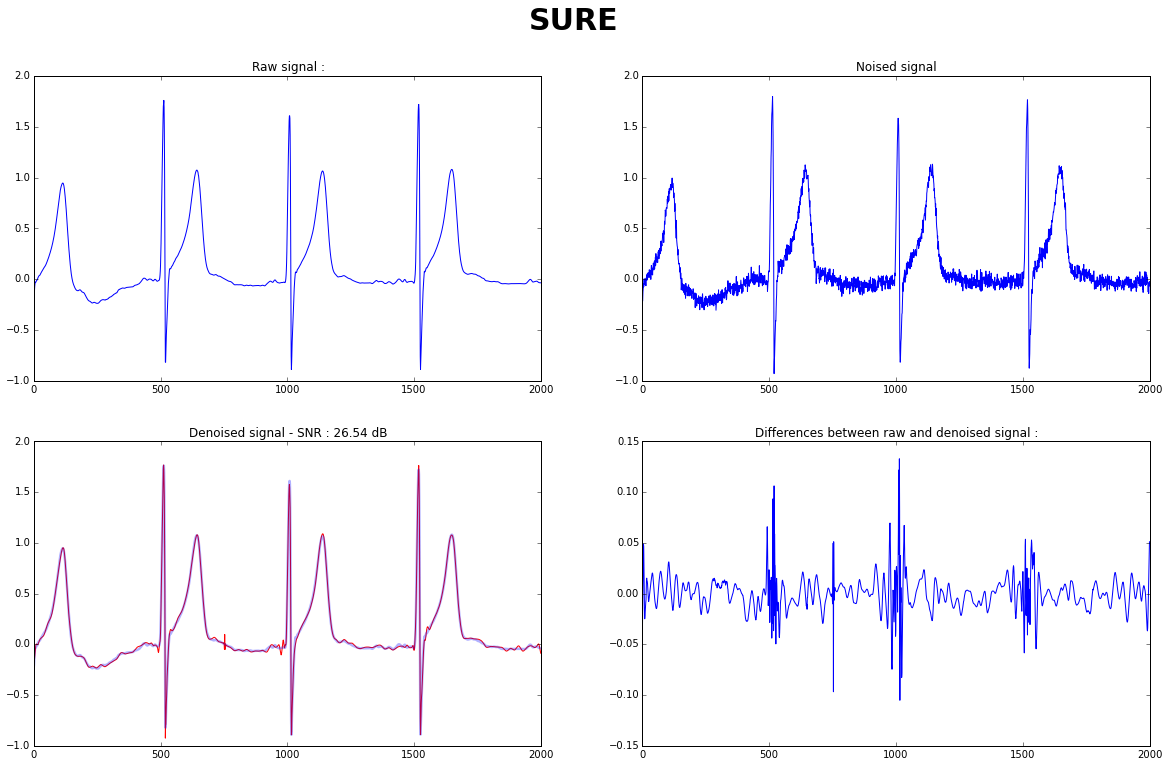

In [214]:
w = pywt.Wavelet('bior6.8')
sc.filt_plot(Yb[ind], Y[ind], sc.multi_wave_filter, params={"w":w }, title="SURE")

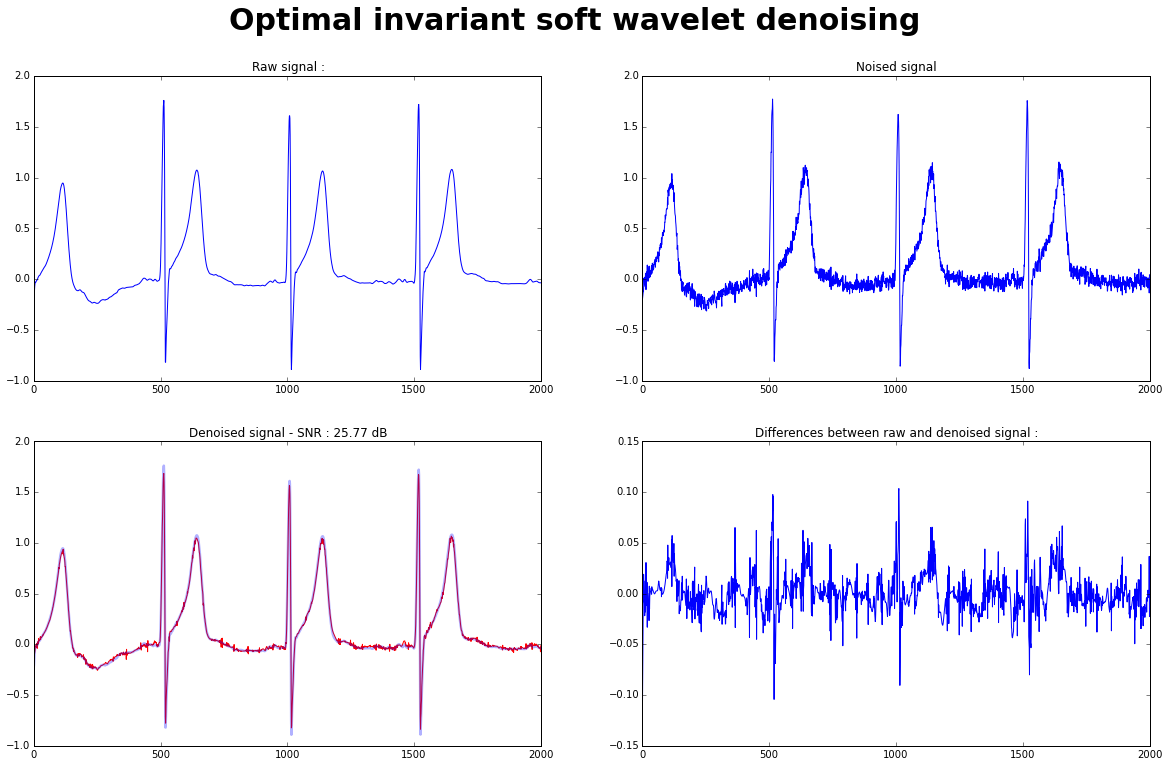

In [208]:
sc.filt_plot(Yb[ind], Y[ind], sc.invariant_wave_filter, params={"sigma": sigma, "tau": tausoft, "w" : 'db6', "mode" : 'soft', "m": 200}, title="Optimal invariant soft wavelet denoising")

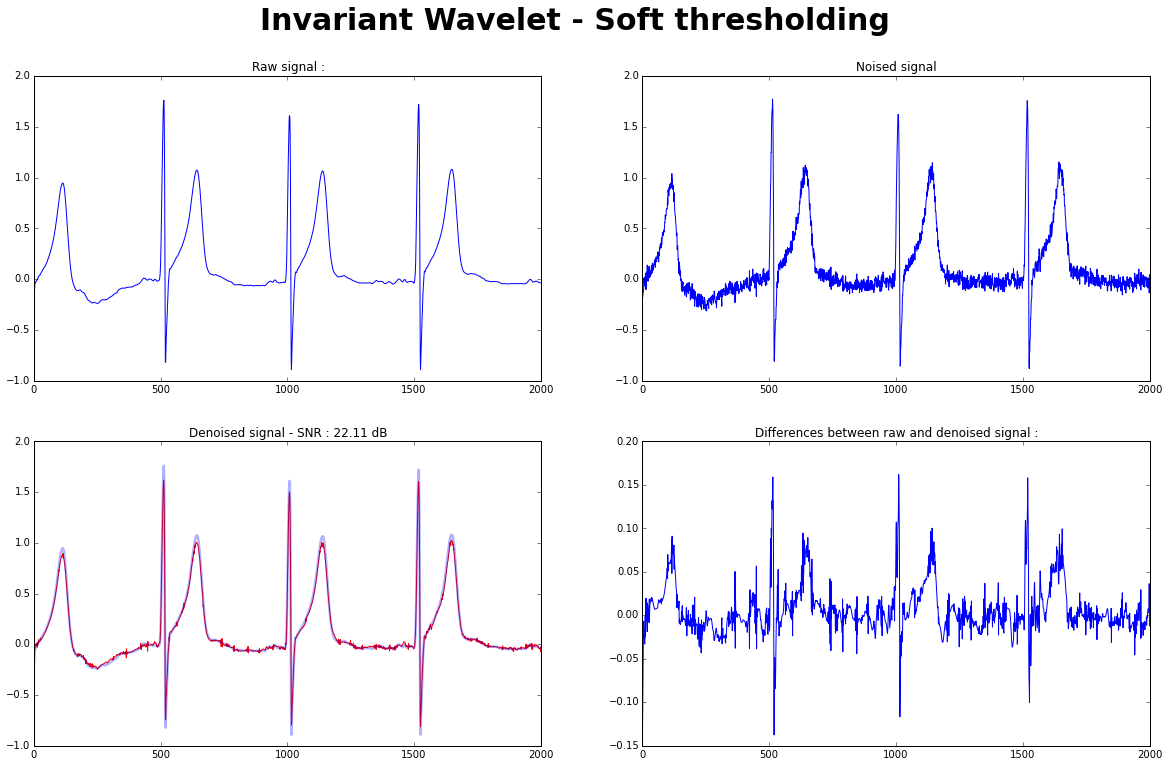

In [209]:
sc.filt_plot(Yb[ind], Y[ind], sc.invariant_wave_filter, params={"sigma": sigma, "tau": 1.5, "w" : 'db6', "mode" : 'soft', "m": 25}, title="Invariant Wavelet - Soft thresholding")

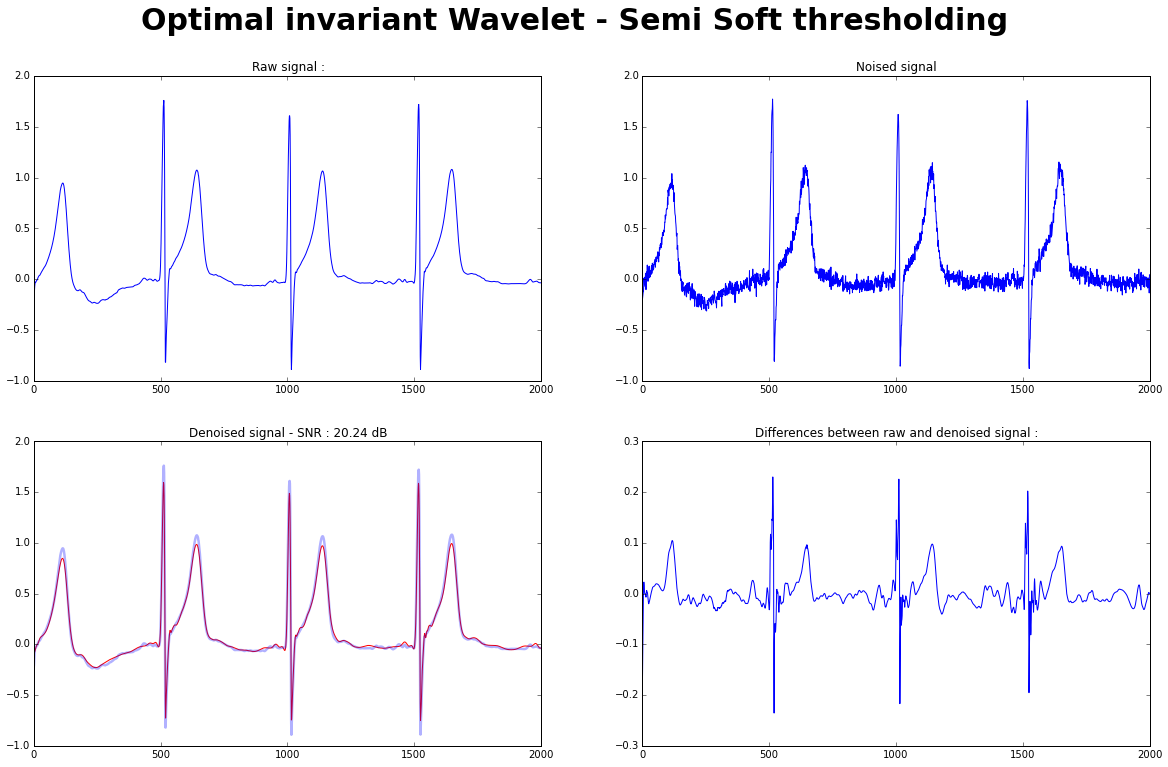

In [210]:
sc.filt_plot(Yb[ind], Y[ind], sc.invariant_wave_filter, params={"sigma": sigma, "tau": tausm, "w": 'db6', "mode": 'semisoft', "mu":1.1,  "m": 400}, title="Optimal invariant Wavelet - Semi Soft thresholding")

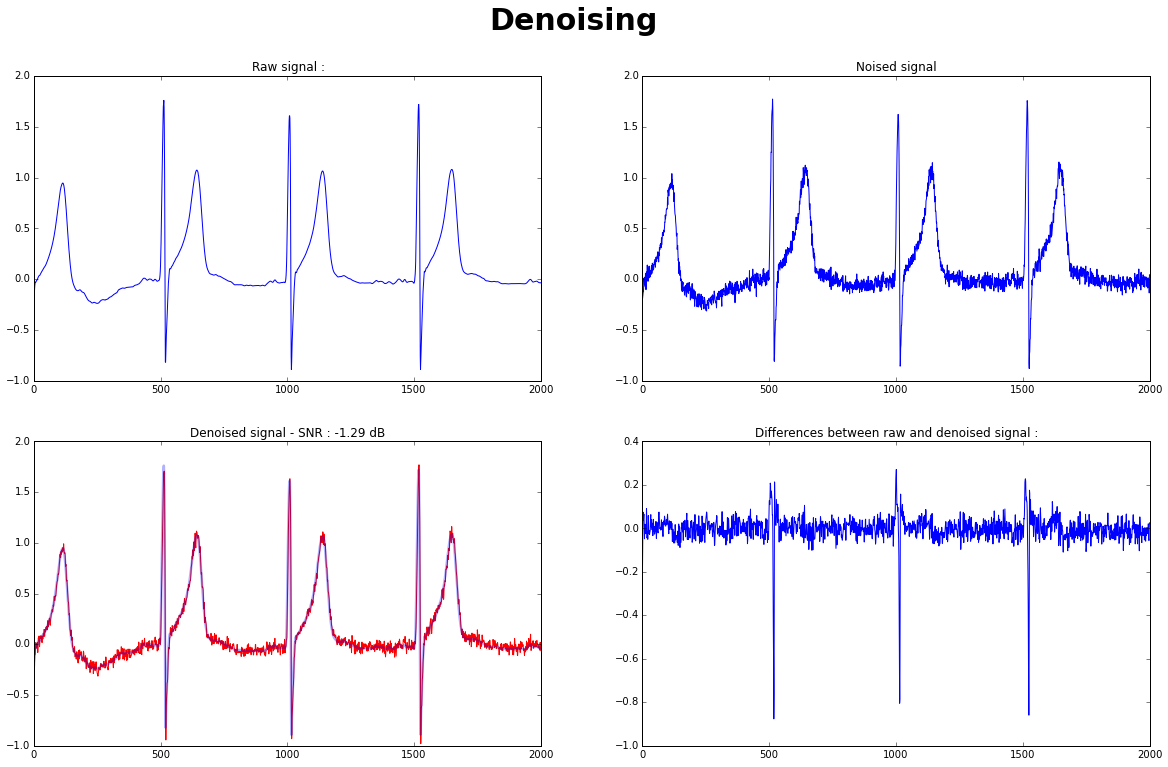

In [211]:
sc.filt_plot(Yb[ind], Y[ind], sc.butter_bandpass_filter, params={"lowcut": 0.0001, "highcut": 150, "fs" : 500, "order": 5})